# Exercise 6 

In this Jupyter Notebook I simulated a 1D Ising Model and I computed some intersting quantities. <br>
The simulations was made using two different algorithm: Metropolis and Gibbs. The first one propose a spin flip that could be accepted or not depending on the energy variation while the second replace a spin with a value chosen from the conditional distribution defined by the other spins.
                                                                                                    

In the following I assume units such $\mu_B=1$ and $k_B=1$ and the observables are per spin, because due to the pbc is impossible to compute the observables of a system.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [5]:
points=100
h=0.02
T = np.linspace(0.4,2.1,num=points)
beta = 1/T
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
e = -J*( th + ch*thN )/( 1 + thN )
heat_c=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# <span style="color:green"> Ising Model 1D </span>

[]

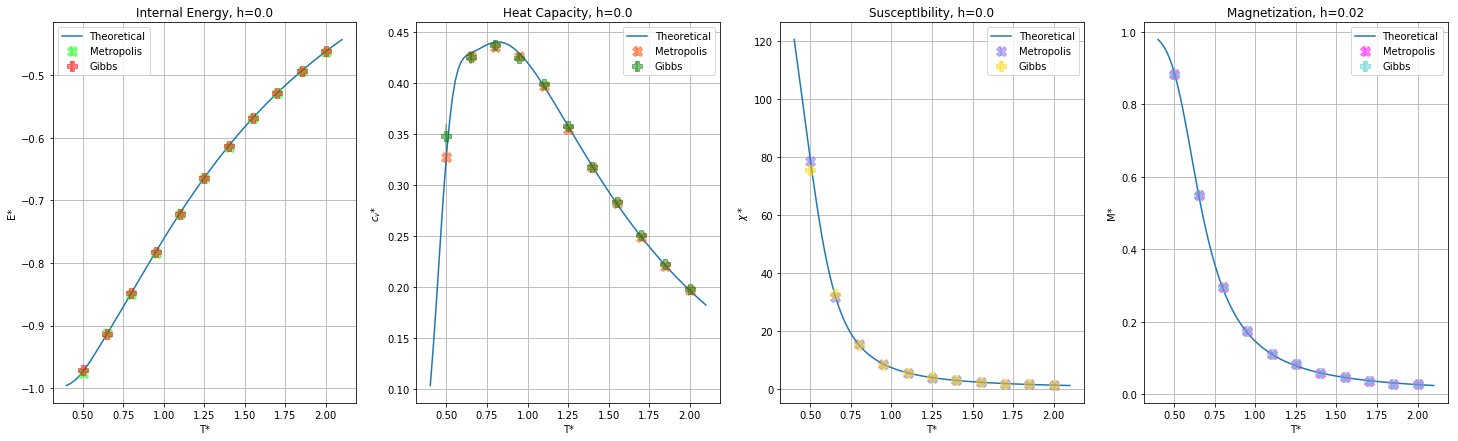

In [8]:
path_ene_metro = "ISING_1D/Metropolis/final.ene.metropolis.out"
path_heat_metro = "ISING_1D/Metropolis/final.heat.metropolis.out"
path_chi_metro = "ISING_1D/Metropolis/final.chi.metropolis.out"
path_mag_metro = "ISING_1D/Metropolis/final.mag.metropolis.out"

path_ene_gibbs = "ISING_1D/Gibbs/final.ene.gibbs.out"
path_heat_gibbs = "ISING_1D/Gibbs/final.heat.gibbs.out"
path_chi_gibbs = "ISING_1D/Gibbs/final.chi.gibbs.out"
path_mag_gibbs = "ISING_1D/Gibbs/final.mag.gibbs.out"

x_ene_metro, ene_metro, err_ene_metro = np.loadtxt(path_ene_metro, usecols=(0,1,2), unpack='true')
x_ene_gibbs, ene_gibbs, err_ene_gibbs = np.loadtxt(path_ene_gibbs, usecols=(0,1,2), unpack='true')
x_heat_metro, heat_metro, err_heat_metro = np.loadtxt(path_heat_metro, usecols=(0,1,2), unpack='true')
x_heat_gibbs, heat_gibbs, err_heat_gibbs = np.loadtxt(path_heat_gibbs, usecols=(0,1,2), unpack='true')
x_chi_metro, chi_metro, err_chi_metro = np.loadtxt(path_chi_metro, usecols=(0,1,2), unpack='true')
x_chi_gibbs, chi_gibbs, err_chi_gibbs = np.loadtxt(path_chi_gibbs, usecols=(0,1,2), unpack='true')
x_mag_metro, mag_metro, err_mag_metro = np.loadtxt(path_mag_metro, usecols=(0,1,2), unpack='true')
x_mag_gibbs, mag_gibbs, err_mag_gibbs = np.loadtxt(path_mag_gibbs, usecols=(0,1,2), unpack='true')

fig, (ene_plot, heat_plot, chi_plot, mag_plot) = plt.subplots(1, 4, figsize=(25,7))

ene_plot.plot(T,e,label="Theoretical")
ene_plot.errorbar(x_ene_metro, ene_metro, yerr=err_ene_metro, marker="X", markersize="10", linestyle="none", label="Metropolis", color="lime", alpha=0.48)
ene_plot.errorbar(x_ene_gibbs, ene_gibbs, yerr=err_ene_gibbs, marker="P", markersize="10", linestyle="none", label="Gibbs", color="red", alpha = 0.48)
ene_plot.grid(True)
ene_plot.set_xlabel("T*")
ene_plot.set_ylabel("E*")
ene_plot.legend()
ene_plot.set_title("Internal Energy, h=0.0")

heat_plot.plot(T,heat_c, label="Theoretical")
heat_plot.errorbar(x_heat_metro, heat_metro, yerr=err_heat_metro, marker="X", markersize="10", linestyle="none", label="Metropolis", color="orangered", alpha=0.48)
heat_plot.errorbar(x_heat_gibbs, heat_gibbs, yerr=err_heat_gibbs, marker="P", markersize="10", linestyle="none", label="Gibbs", color="green", alpha=0.48)
heat_plot.grid(True)
heat_plot.set_xlabel("T*")
heat_plot.set_ylabel("$c_v$*")
heat_plot.legend()
heat_plot.set_title("Heat Capacity, h=0.0")

chi_plot.plot(T,X, label="Theoretical")
chi_plot.errorbar(x_chi_metro, chi_metro, yerr=err_chi_metro, marker="X", markersize="10", linestyle="none", label="Metropolis", color="mediumslateblue", alpha=0.48)
chi_plot.errorbar(x_chi_gibbs, chi_gibbs, yerr=err_chi_gibbs, marker="P", markersize="10", linestyle="none", label="Gibbs", color="gold", alpha=0.48)
chi_plot.grid(True)
chi_plot.set_xlabel("T*")
chi_plot.set_ylabel("$\chi*$")
chi_plot.legend()
chi_plot.set_title("SusceptIbility, h=0.0")

mag_plot.plot(T,M, label="Theoretical")
mag_plot.errorbar(x_mag_metro, mag_metro, yerr=err_mag_metro, marker="X", markersize="10", linestyle="none", label="Metropolis", color="fuchsia", alpha=0.48)
mag_plot.errorbar(x_mag_gibbs, mag_metro, yerr=err_mag_metro, marker="P", markersize="10", linestyle="none", label="Gibbs", color="mediumturquoise", alpha=0.48)
mag_plot.grid(True)
mag_plot.set_xlabel("T*")
mag_plot.set_ylabel("M*")
mag_plot.legend()
mag_plot.set_title("Magnetization, h=0.02")

plt.plot()

All the graphs shows the reiability of both algorithms, in fact the data obtained using Gibbs and Metropolis follow the theoretical function almost perfectly. <br>
It's intersting the smooth peak in the heat capacity graph beacuse suggest the system tried to have a phase transition but with no results, in fact the 1D Ising model hasn't a ferromagnetic phase with h=0.<br>

Susceptibility computing was not so trivial because computing the susceptibility using the fluctuation of the magnetization ( $\chi \propto \left<M^2 \right> - \left< M \right>^2 $) conduces to a wrong result because even if $\left<M\right>$ should be zero due to the paramagnetic phase, its value might not be exactly zero. So I setted manually the magnetization mean to zero and I proceded to compute the susceptability as $\chi = \beta \left<M^2\right>$.<br>

The magnetization graph shows how the presence of an external magnetic field leads to a ferromagnetic phase for low temperatures.